# Practical Seven: Object Detection and Instance Segmentation

This notebook will introduce you to object detection and instance segmentation in PyTorch. We will use pre-trained models available from [PyTorch Hub](https://pytorch.org/hub/), and model design and training are not within the scope of our course.

### References
* [Pytorch models and pre-trained weights](https://pytorch.org/vision/stable/models.html)

In [1]:
!pip install distinctipy

In [2]:
def get_colors(num_colors):
    from distinctipy import distinctipy
    import numpy as np
    colors_ = distinctipy.get_colors(num_colors)
    colors = []
    for color_ in colors_:
        color = (np.uint8(color_[0] * 255), np.uint8(color_[1] * 255), np.uint8(color_[2] * 255))
        colors.append(color)
    return colors

# Object Detection with Faster R-CNN

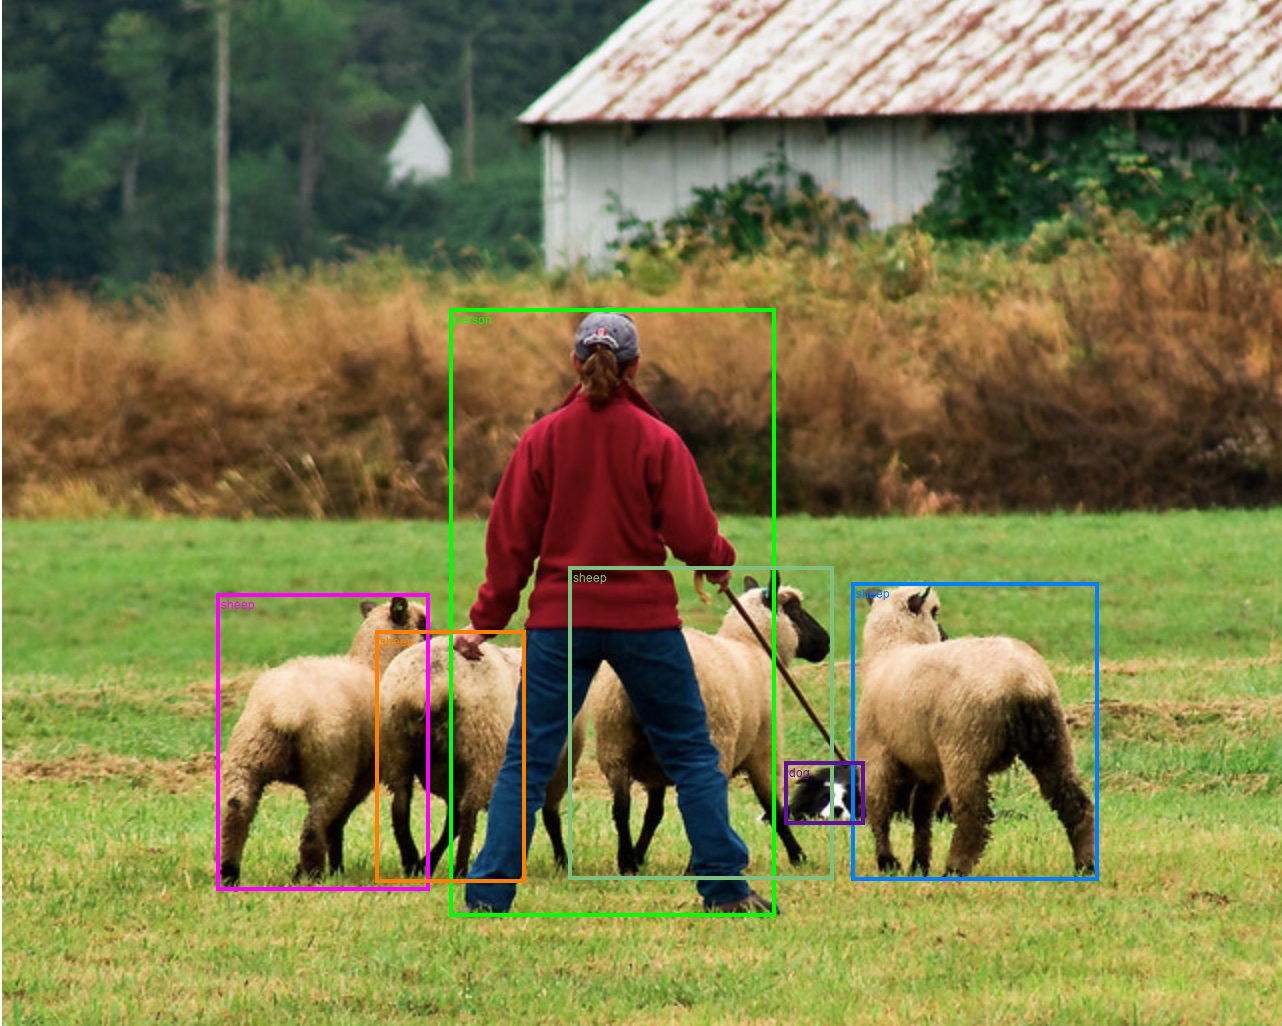

In [3]:
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

# Step 0: Load an image
img = read_image("../data/sample1.jpg")

# Step 1: Initialize model with the best available weights
box_score_thresh = 0.9
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=box_score_thresh)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
colors = get_colors(len(prediction['labels']))
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors=colors,
                          width=4, font='Arial', font_size=12)
im = to_pil_image(box.detach())
display(im)

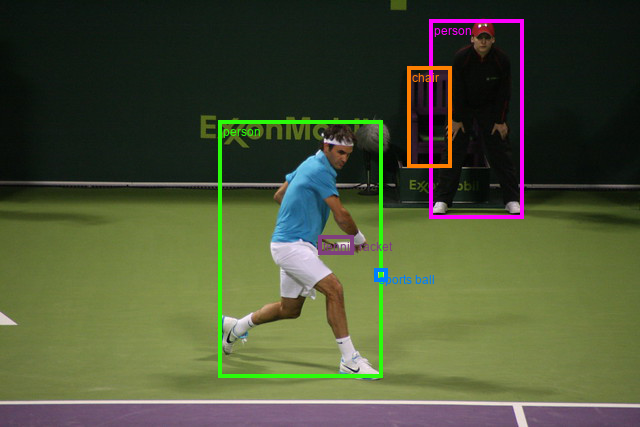

In [4]:
# Step 0: Load an image
img = read_image("../data/sample2.jpg")

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
colors = get_colors(len(prediction['labels']))
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors=colors,
                          width=4, font='Arial', font_size=12)
im = to_pil_image(box.detach())
display(im)

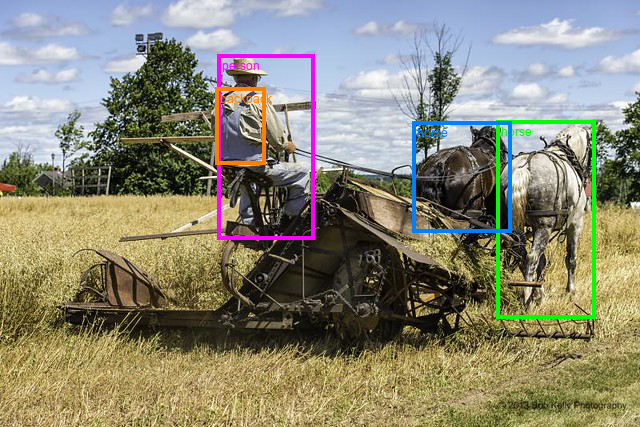

In [5]:
# Step 0: Load an image
img = read_image("../data/sample3.jpg")

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
colors = get_colors(len(prediction['labels']))
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors=colors,
                          width=4, font='Arial', font_size=12)
im = to_pil_image(box.detach())
display(im)

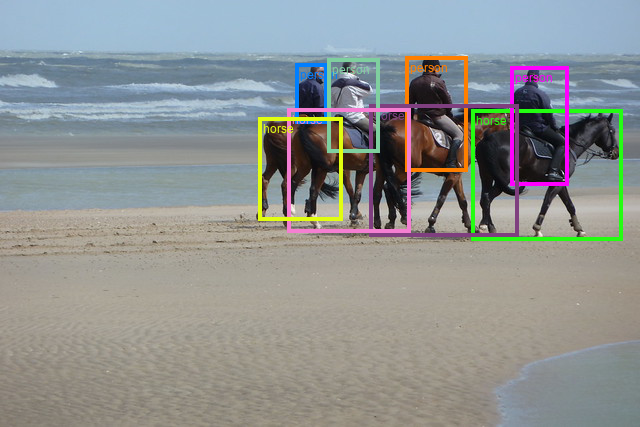

In [6]:
# Step 0: Load an image
img = read_image("../data/sample4.jpg")

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
colors = get_colors(len(prediction['labels']))
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors=colors,
                          width=4, font='Arial', font_size=12)
im = to_pil_image(box.detach())
display(im)

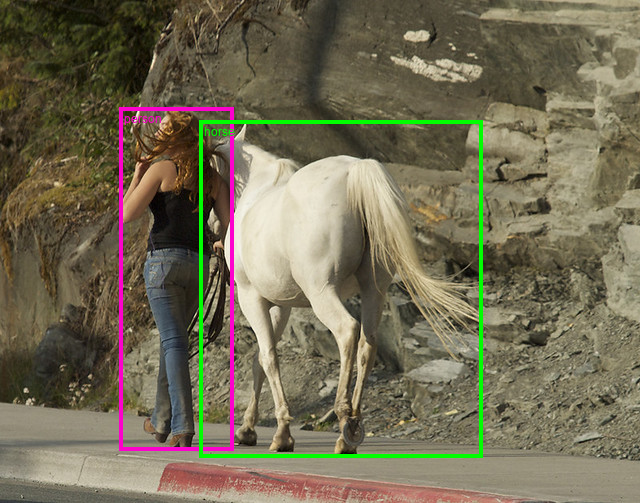

In [7]:
# Step 0: Load an image
img = read_image("../data/sample5.jpg")

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
colors = get_colors(len(prediction['labels']))
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors=colors,
                          width=4, font='Arial', font_size=12)
im = to_pil_image(box.detach())
display(im)

# Instance Segmentation with Mask R-CNN

In [8]:
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.models.detection import maskrcnn_resnet50_fpn_v2, MaskRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.utils import draw_segmentation_masks
from torchvision.transforms.functional import to_pil_image

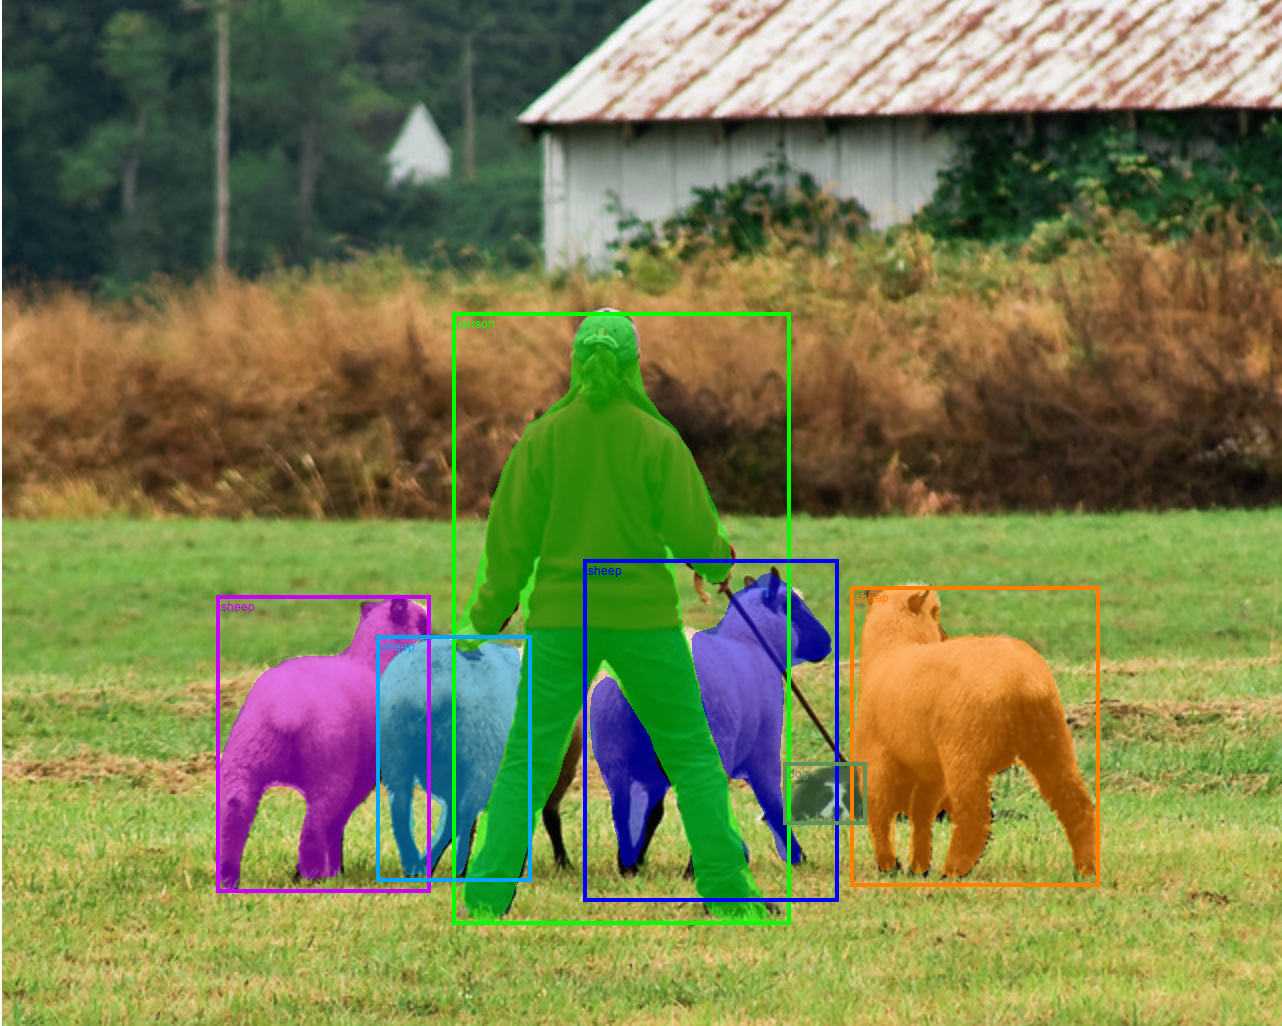

In [9]:
# Step 0: Load an image
img = read_image("../data/sample1.jpg")

# Step 1: Initialize model with the best available weights
box_score_thresh = 0.9
weights = MaskRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = maskrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=box_score_thresh)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]

colors = get_colors(len(prediction['labels']))
box = img.clone().detach()
box = draw_segmentation_masks(box, masks=prediction['masks'][:,0,:,:]>0.5, colors=colors, alpha=0.5)

labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(box, boxes=prediction["boxes"],
                          labels=labels,
                          colors=colors,
                          width=4, font='Arial', font_size=12)

im = to_pil_image(box.detach())
display(im)

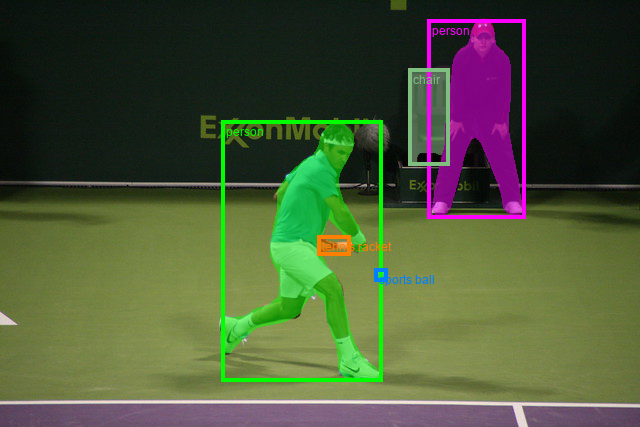

In [10]:
# Step 0: Load an image
img = read_image("../data/sample2.jpg")

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]

colors = get_colors(len(prediction['labels']))
box = img.clone().detach()
box = draw_segmentation_masks(box, masks=prediction['masks'][:,0,:,:]>0.5, colors=colors, alpha=0.5)

labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(box, boxes=prediction["boxes"],
                          labels=labels,
                          colors=colors,
                          width=4, font='Arial', font_size=12)

im = to_pil_image(box.detach())
display(im)

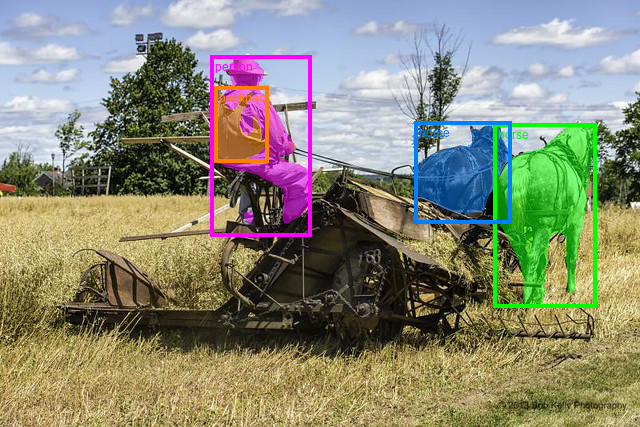

In [11]:
# Step 0: Load an image
img = read_image("../data/sample3.jpg")

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]

colors = get_colors(len(prediction['labels']))
box = img.clone().detach()
box = draw_segmentation_masks(box, masks=prediction['masks'][:,0,:,:]>0.5, colors=colors, alpha=0.5)

labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(box, boxes=prediction["boxes"],
                          labels=labels,
                          colors=colors,
                          width=4, font='Arial', font_size=12)

im = to_pil_image(box.detach())
display(im)

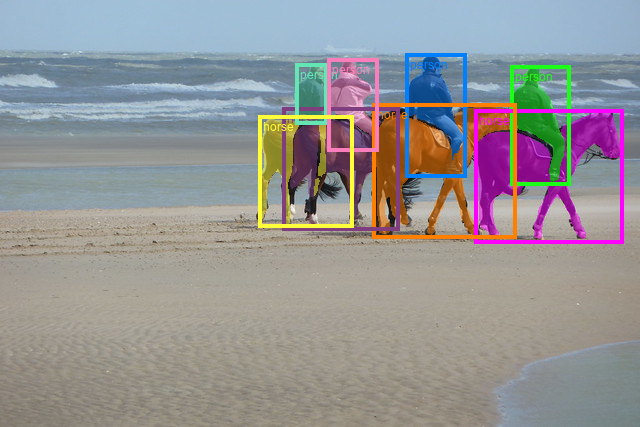

In [12]:
# Step 0: Load an image
img = read_image("../data/sample4.jpg")

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]

colors = get_colors(len(prediction['labels']))
box = img.clone().detach()
box = draw_segmentation_masks(box, masks=prediction['masks'][:,0,:,:]>0.5, colors=colors, alpha=0.5)

labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(box, boxes=prediction["boxes"],
                          labels=labels,
                          colors=colors,
                          width=4, font='Arial', font_size=12)

im = to_pil_image(box.detach())
display(im)

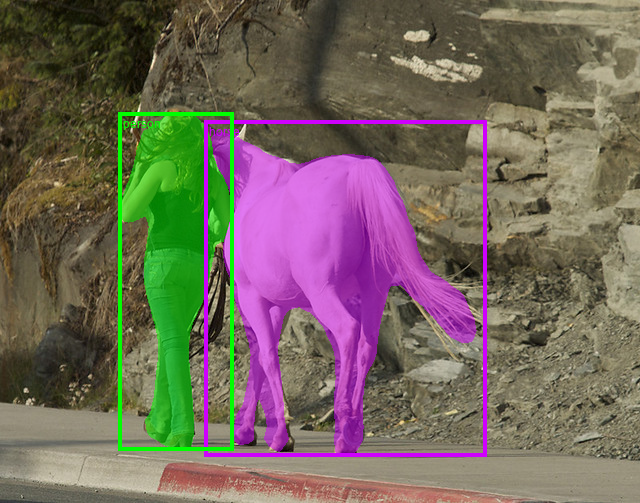

In [13]:
# Step 0: Load an image
img = read_image("../data/sample5.jpg")

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]

colors = get_colors(len(prediction['labels']))
box = img.clone().detach()
box = draw_segmentation_masks(box, masks=prediction['masks'][:,0,:,:]>0.5, colors=colors, alpha=0.5)

labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(box, boxes=prediction["boxes"],
                          labels=labels,
                          colors=colors,
                          width=4, font='Arial', font_size=12)

im = to_pil_image(box.detach())
display(im)